In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action = 'ignore', category = FutureWarning)

plt.rcParams.update({'axes.facecolor' : '#f7ead4'}) 

In [2]:
# import dataframe
df = pd.read_csv('deaths_on_eight-thousanders.csv')

In [3]:
df.head(5)

,Date,Name,Nationality,Cause of death,Mountain
0,2023-07-27,Muhammad Hassan,Pakistan,Unknown,K2
1,2022-07-22,Matthew Eakin,Australia,Fall,K2
2,2022-07-22,Richard Cartier,Canada,Fall,K2
3,2022-07-21,Ali Akbar Sakhi,Afghanistan,"Unknown, suspected altitude sickness",K2
4,2021-07-25,Rick Allen,United Kingdom,Avalanche,K2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            1078 non-null   object
 1   Name            1078 non-null   object
 2   Nationality     1076 non-null   object
 3   Cause of death  1069 non-null   object
 4   Mountain        1078 non-null   object
dtypes: object(5)
memory usage: 42.2+ KB


In [5]:
# check for null values
df.isnull().sum()

Date              0
Name              0
Nationality       2
Cause of death    9
Mountain          0
dtype: int64

In [6]:
# replace column names
df.columns = ['Date', 'Name', 'Nationality', 'Cause', 'Mountain']

In [7]:
# check for main causes of death
df['Cause'].value_counts()

Cause
Avalanche                                                                   276
Fall                                                                        205
Altitude sickness                                                            60
Exposure                                                                     35
Disappeared                                                                  35
                                                                           ... 
Hit by falling seracs, died in hospital                                       1
Probably altitude sickness                                                    1
Rescue helicopter crash                                                       1
Probably fall                                                                 1
Suffered from HAPE, later died in hospital due to cardiopulmonary arrest      1
Name: count, Length: 181, dtype: int64

In [8]:
# na's can be considered as unknown cases of death
df['Cause'] = df['Cause'].fillna('Unknown')

In [9]:
df['Cause'] = df['Cause'].str.lower()

for element in df['Cause']:
    if 'serac' in element:
        df.replace(element, 'Avalanche', inplace = True)
    elif 'fall' in element:
        df.replace(element, 'Fall', inplace = True)
    elif 'fell' in element:
        df.replace(element, 'Fall', inplace = True)   
    elif 'disappeared' in element:
        df.replace(element, 'Disappeared', inplace = True)
    elif 'disappearance' in element:
        df.replace(element, 'Disappeared', inplace = True)
    elif 'illnes' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'avalanche' in element:
        df.replace(element, 'Avalanche', inplace = True)
    elif 'unspecified' in element:
        df.replace(element, 'Unknown', inplace = True)
    elif 'unknown' in element:
        df.replace(element, 'Unknown', inplace = True)
    elif 'altitude' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'storm' in element:
        df.replace(element, 'Storm', inplace = True)
    elif 'weather' in element:
        df.replace(element, 'Storm', inplace = True)
    elif 'lightning' in element:
        df.replace(element, 'Storm', inplace = True)
    elif 'exposure' in element:
        df.replace(element, 'Exposure', inplace = True)
    elif 'cardiac' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'stroke' in element:
        df.replace(element, 'Illnes', inplace = True) 
    elif 'heart' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'exhaustion' in element:
        df.replace(element, 'Exhaustion', inplace = True)
    elif 'pneumonia' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'pulmonary' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'edema' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'thrombosis' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'hemorrhage' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'hape' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'hace' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'respiratory' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'hypothermia' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'frostbite' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'rope' in element:
        df.replace(element, 'Fall', inplace = True)
    elif 'cold' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'organ' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'cerebral' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'sickness' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'coma' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'fever' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'collapsed' in element:
        df.replace(element, 'Exhaustion', inplace = True)
    # the remaining causes can be categorized as 'Other', since they're unique cases that don't fall into other groups
    if element.islower():
        df.replace(element, 'Other', inplace = True)

In [10]:
# check for our new cases of death
df['Cause'].value_counts()

Cause
Avalanche      340
Fall           292
Illnes         175
Disappeared     93
Exposure        50
Unknown         47
Exhaustion      39
Other           22
Storm           20
Name: count, dtype: int64

In [11]:
# check na's in the 'Name' column
df['Name'].isnull().sum()

0

In [12]:
# check for duplicates in the 'Name' column
print(f"Are there duplicates? {not (len(df['Name'].unique()) == len(df))}")

Are there duplicates? True


In [13]:
# how many duplicates there are?
df['Name'] = df['Name'].drop_duplicates()
df['Name'].isnull().sum()

25

In [14]:
# drop the duplicates
df = df.dropna()
# check for duplicates
print(f"Are there duplicates? {not (len(df['Name'].unique()) == len(df))}")

Are there duplicates? False


In [15]:
# set the names as indexes
df = df.set_index('Name', drop = True)

In [16]:
def new_df_mountain(df, mountain):
    '''
    Function for creating a new dataframe for every mountain in the main dataframe
    '''
    mask = df['Mountain'] == mountain
    new_df = df[mask]
    new_df = new_df.drop(columns = 'Mountain')
    return new_df

In [17]:
list_of_df_mountain_names = [('df_' + element).lower().replace(' ', '_') for element in df['Mountain'].unique()]
list_of_mountain_names = list(df['Mountain'].unique())

# Dictionary to store DataFrames
mountain_dfs = {}

for element, name in zip(list_of_df_mountain_names, list_of_mountain_names):
    mountain_dfs[element] = new_df_mountain(df, name)

In [18]:
mountain_dfs

{'df_k2':                        Date     Nationality        Cause
 Name                                                    
 Muhammad Hassan  2023-07-27        Pakistan      Unknown
 Matthew Eakin    2022-07-22       Australia         Fall
 Richard Cartier  2022-07-22          Canada         Fall
 Ali Akbar Sakhi  2022-07-21     Afghanistan      Unknown
 Rick Allen       2021-07-25  United Kingdom    Avalanche
 ...                     ...             ...          ...
 Art Gilkey       1953-08-10   United States    Avalanche
 Pasang Kikuli    1939-07-31           Nepal  Disappeared
 Pasang Kitar     1939-07-31           Nepal  Disappeared
 Pintso           1939-07-31           Nepal  Disappeared
 Dudley Wolfe     1939-07-30   United States       Illnes
 
 [96 rows x 3 columns],
 'df_kangchenjunga':                                           Date    Nationality        Cause
 Name                                                                      
 Luis Stitzinger                     20

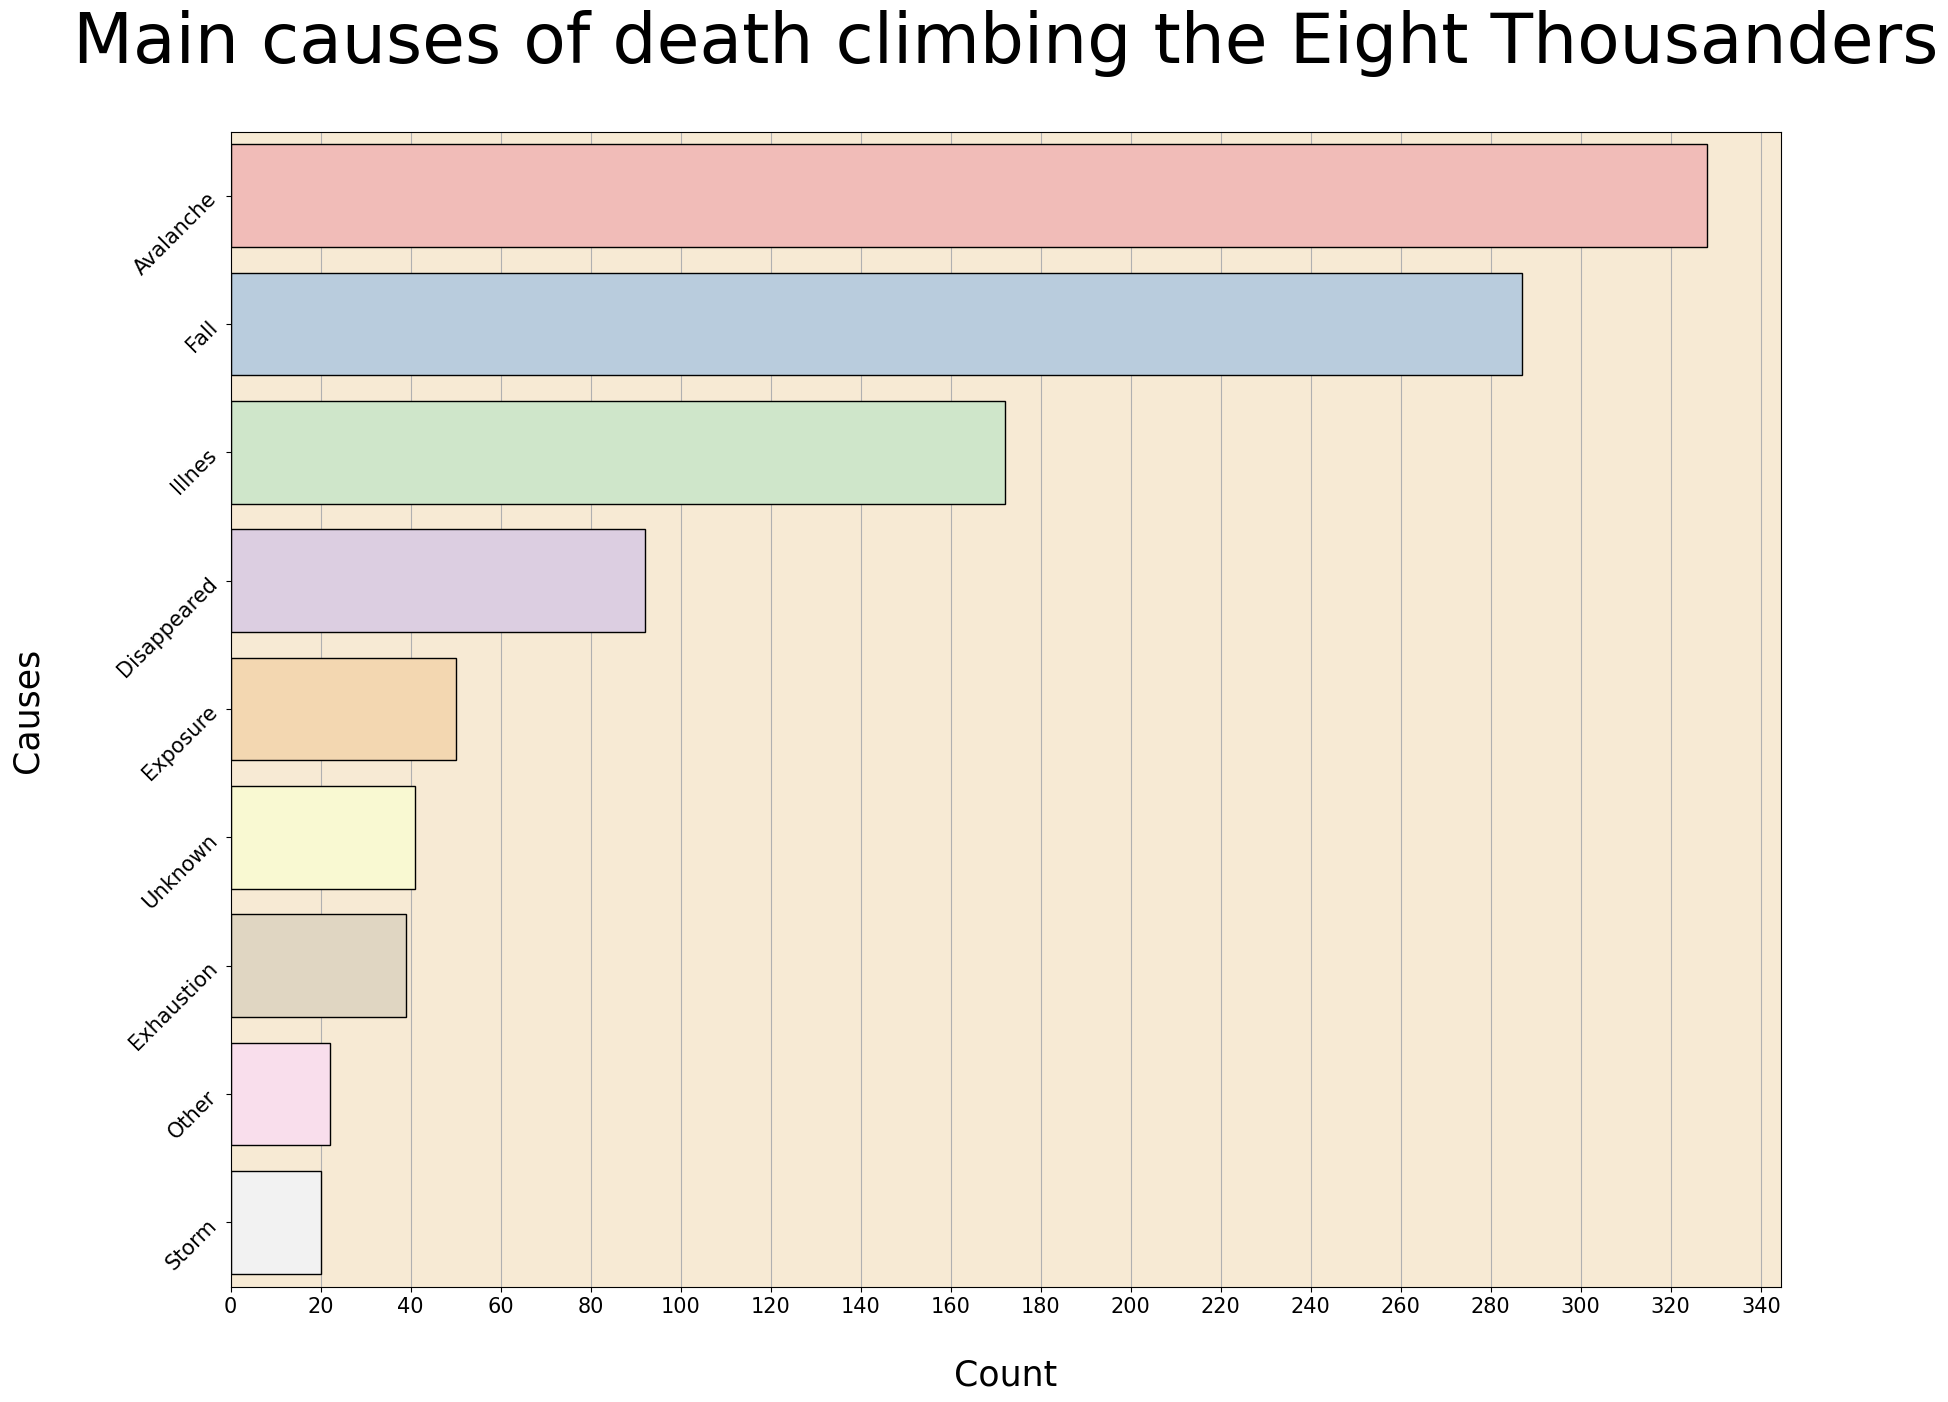

In [20]:
plt.rcParams.update({'axes.grid' : True,
                     'axes.axisbelow' : True})
plt.figure(figsize = (20, 15))
plt.title('Main causes of death climbing the Eight Thousanders', fontsize = 50, pad = 50)

sns.barplot(x = df['Cause'].value_counts(), 
            y = df['Cause'].value_counts().index, 
            palette = 'Pastel1', 
            hue = df['Cause'].value_counts().index, 
            legend = False,
            edgecolor = 'black')
plt.ylabel('Causes', fontsize = 25, labelpad = 50)
plt.yticks(rotation = 45, fontsize = 15)
plt.xlabel('Count', fontsize = 25, labelpad = 30)
plt.xticks(ticks = range(0, 360, 20), fontsize = 15)

plt.show()

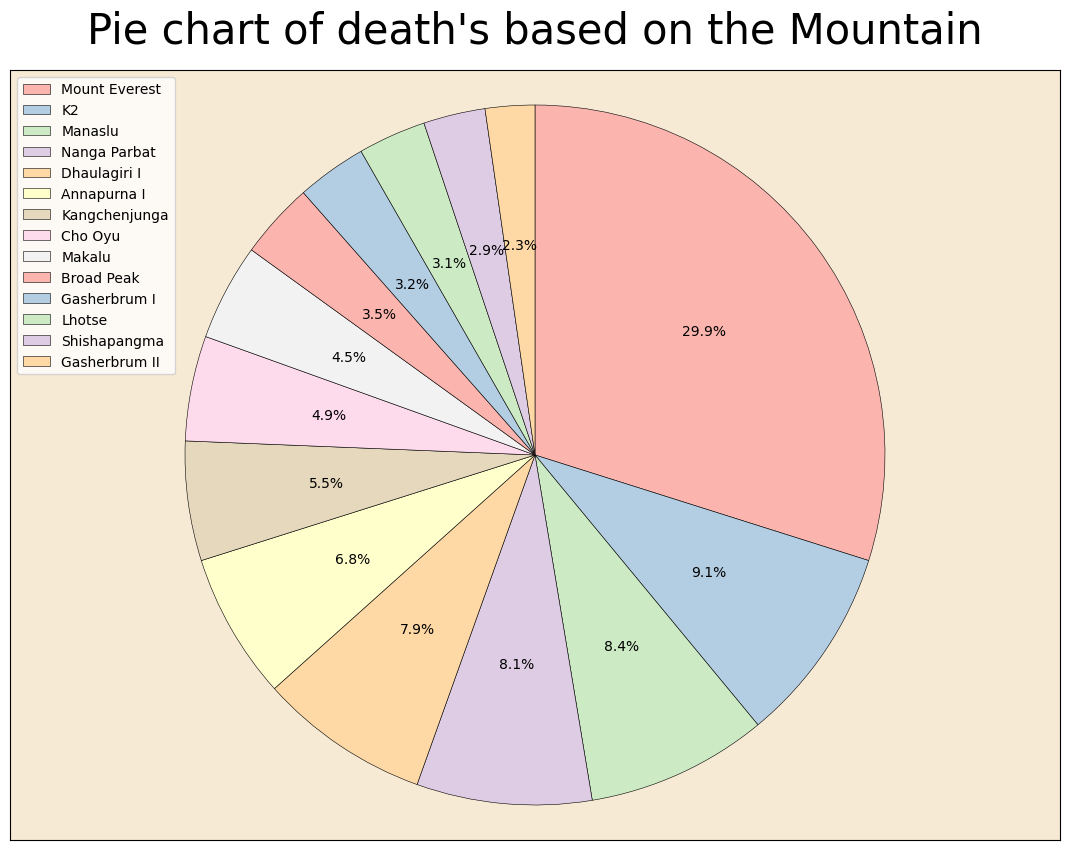

In [33]:
plt.figure(figsize = (15, 10))
plt.title("Pie chart of death's based on the Mountain", fontsize = 30, pad = 20)

plt.pie(x = df['Mountain'].value_counts(), 
        labels = ['']*len(df['Mountain'].value_counts()),
        autopct = '%.1f%%',
        colors = sns.color_palette('Pastel1'),
        wedgeprops = {'edgecolor' : 'black',
                      'linewidth' : 0.4},
        frame = True,
        startangle = 90,
        counterclock = False)
plt.xticks([])
plt.yticks([])
plt.legend(labels = df['Mountain'].value_counts().index,
           loc = 'upper left',
           facecolor = 'white')
plt.xlim(-1.5, 1.5)

plt.show()